# CFAR-10 Dataset

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/CIFAR-10)

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-and-processing-the-dataset" data-toc-modified-id="Loading-and-processing-the-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading and processing the dataset</a></span><ul class="toc-item"><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Extract-data-and-targets" data-toc-modified-id="Extract-data-and-targets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Extract data and targets</a></span></li><li><span><a href="#Convert-to-Pytorch-tensors" data-toc-modified-id="Convert-to-Pytorch-tensors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Convert to Pytorch tensors</a></span></li><li><span><a href="#Cast-data-to-float32" data-toc-modified-id="Cast-data-to-float32-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Cast data to float32</a></span></li><li><span><a href="#Class-labels" data-toc-modified-id="Class-labels-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Class labels</a></span></li><li><span><a href="#Display-images" data-toc-modified-id="Display-images-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Display images</a></span></li></ul></li><li><span><a href="#Wrap-tensors-into-datasets" data-toc-modified-id="Wrap-tensors-into-datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Wrap tensors into datasets</a></span><ul class="toc-item"><li><span><a href="#Iterate-over-dataset" data-toc-modified-id="Iterate-over-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Iterate over dataset</a></span></li></ul></li><li><span><a href="#Is-the-training-dataset-balanced?" data-toc-modified-id="Is-the-training-dataset-balanced?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Is the training dataset balanced?</a></span><ul class="toc-item"><li><span><a href="#Computing-the-frequency-of-each-digit" data-toc-modified-id="Computing-the-frequency-of-each-digit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Computing the frequency of each digit</a></span></li><li><span><a href="#Computing-the-percentages-of-each-digit-in-the-training-dataset" data-toc-modified-id="Computing-the-percentages-of-each-digit-in-the-training-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Computing the percentages of each digit in the training dataset</a></span></li><li><span><a href="#Plotting-percentages-of-each-digit-in-a-bar-chart" data-toc-modified-id="Plotting-percentages-of-each-digit-in-a-bar-chart-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plotting percentages of each digit in a bar chart</a></span></li></ul></li></ul></div>

## Loading and processing the dataset

### Loading data

In [156]:
import torch
from torchvision import datasets, transforms

#Loading training data
train = datasets.CIFAR10(
    root="", #Folder where the dataset to be stored; empty means stored in current folder
    train=True, #Download the 'training' dataset, False => download 'test' dataset
    download=True, #Should be 'True' in the first time downling the dataset, else 'False'
)

#Loading test data
test = datasets.CIFAR10(
    root="",
    train=False,
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


### Extract data and targets

In [157]:
trainX, trainY = train.data, train.targets
testX,  testY  = test.data,  test.targets

print("Type => ", "trainX = ", type(trainX), "trainY = ", type(trainY))
print("Type => ", "testX  = ", type(testX),  "testY  = ", type(testY))

Type =>  trainX =  <class 'numpy.ndarray'> trainY =  <class 'list'>
Type =>  testX  =  <class 'numpy.ndarray'> testY  =  <class 'list'>


### Convert to Pytorch tensors

In [158]:
trainX = torch.from_numpy(trainX)
trainY = torch.IntTensor(trainY)
testX  = torch.from_numpy(testX)
testY  = torch.IntTensor(testY)

print("trainX =>", "type = ", type(trainX), "shape = ", trainX.shape, "dtype = ", trainX.dtype)
print("trainY =>", "type = ", type(trainY), "shape = ", trainY.shape, "dtype = ", trainY.dtype)
print("testX  =>", "type = ", type(testX), "shape = ", testX.shape,  "dtype = ", testX.dtype)
print("testY  =>", "type = ", type(trainY), "shape = ", testY.shape,  "dtype = ", testY.dtype)

trainX => type =  <class 'torch.Tensor'> shape =  torch.Size([50000, 32, 32, 3]) dtype =  torch.uint8
trainY => type =  <class 'torch.Tensor'> shape =  torch.Size([50000]) dtype =  torch.int32
testX  => type =  <class 'torch.Tensor'> shape =  torch.Size([10000, 32, 32, 3]) dtype =  torch.uint8
testY  => type =  <class 'torch.Tensor'> shape =  torch.Size([10000]) dtype =  torch.int32


### Cast data to float32

In [159]:
trainX = trainX.type(dtype=torch.float32)
testX  = testX.type(dtype=torch.float32)

print("trainX =>", "shape = ", trainX.shape, "type = ", trainX.dtype)
print("testX  =>", "shape = ", testX.shape,  "type = ", testX.dtype)

trainX => shape =  torch.Size([50000, 32, 32, 3]) type =  torch.float32
testX  => shape =  torch.Size([10000, 32, 32, 3]) type =  torch.float32


### Class labels

In [171]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(type(classes))
print(classes[1])

<class 'tuple'>
automobile


### Display images

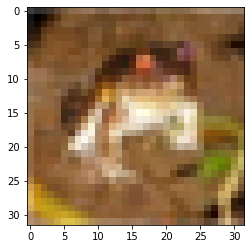

Class =  frog


In [175]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(trainX[0].type(torch.int))
plt.show()

print("Class = ", classes[trainY[0]])

## Wrap tensors into datasets

In [147]:
from torch.utils.data import TensorDataset

trainDS = TensorDataset(trainX, trainY)

for xDS,yDS in trainDS:
    print("xDS => ", "shape = ", xDS.shape, "type = ", xDS.dtype)
    print("yDS => ", "shape = ", yDS.shape, "type = ", yDS.dtype)
    break

xDS =>  shape =  torch.Size([32, 32, 3]) type =  torch.float32
yDS =>  shape =  torch.Size([]) type =  torch.int32


### Iterate over dataset

In [148]:
from torch.utils.data import DataLoader

trainDL = DataLoader(trainDS, batch_size=8, shuffle=True)

for xDL, yDL in trainDL:
    print("xDL => ", "shape = ", xDL.shape, "type = ", xDL.dtype)
    print("yDL => ", "shape = ", yDL.shape, "type = ", yDL.dtype)
    break

xDL =>  shape =  torch.Size([8, 32, 32, 3]) type =  torch.float32
yDL =>  shape =  torch.Size([8]) type =  torch.int32


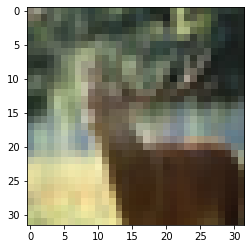

Class =  deer


In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xDL[0].type(torch.int)) #Display the first image of the batch
plt.show()
print("Class = ", classes[yDL[0]])

## Is the training dataset balanced?

### Computing the frequency of each digit

In [150]:
total = 0
count_dictionary = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for Xs, ys in trainDL:
    for y in ys:
        count_dictionary[int(y)] += 1
        total += 1

print("Count of each digit => ", count_dictionary)        
print("Total number of digits in the MNIST training dataset = ", total)

Count of each digit =>  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}
Total number of digits in the MNIST training dataset =  50000


### Computing the percentages of each digit in the training dataset

In [151]:
percentage_dictionary = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0, 7:0.0, 8:0.0, 9:0.0}

for i in count_dictionary:
    percentage_dictionary[i] = count_dictionary[i]/total * 100
    
print(percentage_dictionary)

{0: 10.0, 1: 10.0, 2: 10.0, 3: 10.0, 4: 10.0, 5: 10.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 10.0}


### Plotting percentages of each digit in a bar chart

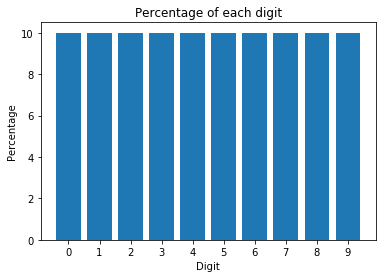

In [152]:
plt.bar(range(len(percentage_dictionary)), list(percentage_dictionary.values()), align='center')
plt.xticks(range(len(percentage_dictionary)), list(percentage_dictionary.keys()))
plt.title("Percentage of each digit")
plt.xlabel("Digit")
plt.ylabel("Percentage")
plt.show()